In [2]:
import pandas as pd
import glob
import os
import re
import math
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean


In [8]:
def metric(path, r_string, type_string, timing=False):
    all_files = glob.glob(os.path.join(path, "*"+r_string+type_string+"*.csv"))
    for file in all_files:
        if os.path.getsize(file) == 0:
            all_files.remove(file)
      
    print(type(all_files))
    results = dict()
    results[type_string] = dict()
    results['reg'] = dict()
    results['time_'+type_string] = dict()
    results['time_reg'] = dict()
    results['CPD_'+type_string] = dict()
    results['CPD_REG'] = dict()
    gnn_results = dict()
    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
    
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        gnn_results[name] = int(max(df['Iteration']))
        # print(df[].head())
    results[type_string] = gnn_results
    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        reg_results[name] = sum(df['Time'])
    results['time_'+type_string] = reg_results
    # print(results)
    reg_results = dict()

    reg_results = dict()
    for gnn_metric in all_files:
        lf = gnn_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__"+type_string+"__")[0]
        # print(name)
        df = pd.read_csv(gnn_metric,index_col=None,header=0)
       
        reg_results[name] = max(df['CPD (ns)'])
    results['CPD_'+type_string] = reg_results
    # print(results)
    reg_results = dict()
    all_files = glob.glob(os.path.join(path, r_string+"*reg*.csv"))
    for file in all_files:
        if os.path.getsize(file) == 0:
            all_files.remove(file)
    for file in all_files:
        if os.path.getsize(file) == 0:
            all_files.remove(file)
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
       
        reg_results[name] = max(df['Iteration'])
        # print(df[].head())  
    results['reg'] = reg_results

    reg_results = dict()
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
        reg_results[name] = sum(df['Time'])
    results['time_reg'] = reg_results

    reg_results = dict()
    for reg_metric in all_files:
        lf = reg_metric.split("/")[-1]
        lf = lf.split(".")[0]
        name = lf.split("__reg__")[0]
        # print(name)
        df = pd.read_csv(reg_metric,index_col=None,header=0)
        reg_results[name] = max(df['CPD (ns)'])
    results['CPD_REG'] = reg_results
        # print(df[].head())

    # print(results)
    my_df = pd.DataFrame.from_dict(results)
    # print(my_df)
    my_df['Reduction'] = (my_df['reg'].values - my_df[type_string].values)/my_df['reg'].values
    # my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)

    # print("{:2%}".format(my_df))
    my_df.dropna(inplace=True)
    print("Average: ", "{:.2%}".format(mean(my_df['Reduction'].values)))

    pd.set_option('expand_frame_repr', False)
    my_df['Reduction']=  pd.Series(["{0:.2f}%".format(val * 100) for val in my_df['Reduction']], index = my_df.index)
    my_df['time_reg']=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_reg']], index = my_df.index)
    my_df['time_'+type_string]=  pd.Series(["{0:.2f}".format(val) for val in my_df['time_'+type_string]], index = my_df.index)
    my_df['CPD_REG']=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_REG']], index = my_df.index)
    my_df['CPD_'+type_string]=  pd.Series(["{0:.2f}".format(val) for val in my_df['CPD_'+type_string]], index = my_df.index)
   
    print(my_df)

In [21]:
def prediction_hist():
    path = "/benchmarks/graph_data/"

    results = []
    graph_files = glob.glob(os.path.join(path, "*-hcost.csv"))
    for graph in graph_files:
        df = pd.read_csv(graph, header=0)
        results.extend(df.values)
    # df = pd.read_csv(graph_files[0],index_col=None,header=0)
    # results = list(filter(lambda x: x > 2, results))
    plt.yscale('log')
    plt.hist(results, 6, color="purple")

ValueError: The 'color' keyword argument must have one color per dataset, but 210003254 datasets and 1 colors were provided

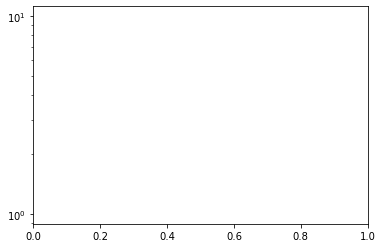

In [22]:
prediction_hist()

In [23]:
path = "/benchmarks/route_metrics/MCNC/"
r_string = "EArch*"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>
Average:  -2.15%
                 gnn  reg time_gnn time_reg CPD_gnn CPD_REG Reduction
EArch__alu4       13   15     0.50     0.15    5.54    5.54    13.33%
EArch__apex2      13   14     8.70     0.28    6.30    6.30     7.14%
EArch__apex4      14   13     8.41     0.17    5.25    5.25    -7.69%
EArch__bigkey     12   10     8.69     0.11    2.64    2.64   -20.00%
EArch__clma       13   13    11.66     1.11   11.31   11.31     0.00%
EArch__des        13   13     9.05     0.21    5.20    5.20     0.00%
EArch__diffeq     12   11     8.33     0.11    6.44    6.44    -9.09%
EArch__dsip       10   10     8.65     0.10    2.64    2.64     0.00%
EArch__elliptic   14   14     9.36     0.38    9.07    9.06     0.00%
EArch__ex1010     15   14    10.02     0.65    7.38    7.37    -7.14%
EArch__ex5p       14   13     8.32     0.15    5.36    5.36    -7.69%
EArch__frisc      12   12     9.31     0.46   11.83   11.83     0.00%
EArch__misex3     14   13     8.38     0.18    5.20    5.2

In [16]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "strat*"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>
Average:  -0.83%
                          gnn  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
stratixiv_arch__alu4        2    2     5.67     0.65    9.29    9.29     0.00%
stratixiv_arch__apex2       3    3     5.99     0.94   10.33   10.33     0.00%
stratixiv_arch__apex4       2    2     5.84     0.60    9.26    9.26     0.00%
stratixiv_arch__bigkey      2    2    16.59     8.84    7.69    7.69     0.00%
stratixiv_arch__clma        2    2     7.66     2.75    9.56    9.58     0.00%
stratixiv_arch__des         2    2    18.67    15.28   11.45   11.45     0.00%
stratixiv_arch__diffeq      2    2     6.42     0.97    7.45    7.45     0.00%
stratixiv_arch__dsip        2    2    15.21     9.76    7.83    7.82     0.00%
stratixiv_arch__elliptic    2    2     9.75     3.97    8.51    8.51     0.00%
stratixiv_arch__ex1010      2    3     7.74     2.13   11.11   11.09    33.33%
stratixiv_arch__ex5p        3    2     5.97     0.67    9.26    9.26   -50.00%
stratixiv_arch__fris

In [ ]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "*EArch*"
type_string = "gnd"
metric(path, r_string, type_string)

In [5]:
path = "/mnt/e/benchmarks/route_metrics/"
r_string = "strat*timing*"
type_string = "gnn"
metric(path, r_string, type_string)

<class 'list'>
Average:  69.63%
                                                     gnn  reg time_gnn time_reg CPD_GNN CPD_REG Reduction
stratixiv_arch__carpat_stratixiv_arch_timing         6.0   22    29.57   134.06    8.23    8.15    72.73%
stratixiv_arch__CHERI_stratixiv_arch_timing         28.0   44   260.57   499.08   17.37   18.35    36.36%
stratixiv_arch__CH_DFSIN_stratixiv_arch_timing       8.0    7    19.76    28.64   71.82   71.82   -14.29%
stratixiv_arch__fir_cascade_stratixiv_arch_timing    2.0   12   102.83   331.43    5.28    6.26    83.33%
stratixiv_arch__jacobi_stratixiv_arch_timing         4.0   19    25.20   101.99  198.24  198.05    78.95%
stratixiv_arch__JPEG_stratixiv_arch_timing           7.0   50    27.79   318.91   16.50   18.80    86.00%
stratixiv_arch__leon2_stratixiv_arch_timing          2.0   12    11.20    18.19    8.77    8.46    83.33%
stratixiv_arch__leon3mp_stratixiv_arch_timing        3.0   13    17.56    42.29   15.68   15.19    76.92%
stratixiv_arch